In [7]:
import numpy as np

from keras.layers import Embedding
from keras.models import Sequential

import utilities

In [101]:
# https://keras.io/layers/embeddings/#embedding 
model = Sequential()
model.add(Embedding(1000, 64, input_length=10))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
assert output_array.shape == (32, 10, 64)

In [111]:
model = Sequential([Embedding(input_dim=13, output_dim=17)])
model.compile('rmsprop', 'mse')

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 30, 17)            221       
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


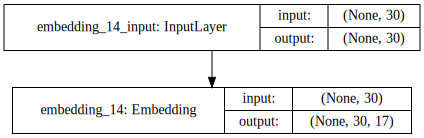

In [113]:
utilities.plot_keras_model(model)

In [114]:
utilities.print_weights_shape(model)

-------------
(13, 17)


In [115]:
weights = model.get_weights()[0]

In [116]:
weights.shape

(13, 17)

In [117]:
x = np.random.choice(a=13, size=(20, 30))

In [118]:
x.shape

(20, 30)

In [119]:
output = model.predict(x)

In [120]:
output.shape

(20, 30, 17)

In [121]:
x[0].shape

(30,)

In [123]:
output[0].shape

(30, 17)

In [124]:
x[0]

array([ 9,  9,  3,  0,  9, 10,  5,  1,  2,  2,  1,  6,  9,  3,  9,  4,  5,
        7,  5,  6,  4,  2,  5,  3,  2, 12,  0,  6,  0,  3])

In [128]:
output[0][0]

array([-0.02957888, -0.01926162, -0.01330246, -0.00882174,  0.04252932,
        0.02901996, -0.01720852, -0.0483361 , -0.00019182, -0.00965265,
        0.00868227,  0.03241241,  0.00987456,  0.00580813,  0.01722812,
        0.02002961,  0.03074607], dtype=float32)

In [126]:
weights[x[0][0]]

array([-0.02957888, -0.01926162, -0.01330246, -0.00882174,  0.04252932,
        0.02901996, -0.01720852, -0.0483361 , -0.00019182, -0.00965265,
        0.00868227,  0.03241241,  0.00987456,  0.00580813,  0.01722812,
        0.02002961,  0.03074607], dtype=float32)

In [129]:
np.alltrue(output[0][0]==weights[x[0][0]])

True

In [130]:
np.alltrue(output[2][3]==weights[x[2][3]])

True

In [133]:
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        assert np.alltrue(output[i][j]==weights[x[i][j]])